### Overview: Prepossing Weather Information Associated with Noise Locations

Step1: Selected weather stations and their weather metrics near Naamsestraat using the file '01_Metadata_v2.csv'.

Step 2: Preprocess weather information detected by the selected weather stations using the original data from 'LC_2022Q1.csv', 'LC_2022Q2.csv', 'LC_2022Q3.csv', 'LC_2022Q4.csv'. 

According to the weather station‘s map generated from Step 1, only 7 stations are nearest Naamesetraat. Then, weather information that is realted to these 7 stations are preprocessed in the following steps.

### Import Modules & Global Settings

In [1]:
import pandas as pd
import folium
from IPython.display import IFrame
from geopy.distance import distance
import warnings
warnings.filterwarnings('ignore')

##### Step 1. Select Weather Stations Near Naamsestraat

In [2]:
# Read noise location information with stations from a .csv file
data = pd.read_csv('..data/raw/dataverse_files/01_Metadata_v2.csv')

data.head() # a glance at the data

,ID,LAT,LON,ALT,LCZ,LC,building_height,SVF,installation_height
0,LC-002,50.847,4.756,47,9,1,4.280000,0.610367,2
1,LC-003,50.870,4.728,44,5,1,5.038286,0.691315,2
2,LC-004,50.871,4.685,31,9,1,9.050964,0.798586,2
3,LC-005,50.881,4.713,26,2,1,5.050000,0.685410,2
4,LC-006,50.912,4.716,13,6,1,0.000000,0.954032,2


In [3]:
# Input latitude and longitude of Leuven Center
naamesetraat_coords = (50.8781, 4.6997)

# Create 'distance' column: distance between Leuven Center and Stations
data['distance'] = data.apply(lambda row: distance(naamesetraat_coords, (row['LAT'], row['LON'])).km, axis=1)

data.head() # check if a 'distance' column has been added

,ID,LAT,LON,ALT,LCZ,LC,building_height,SVF,installation_height,distance
0,LC-002,50.847,4.756,47,9,1,4.280000,0.610367,2,5.261318
1,LC-003,50.870,4.728,44,5,1,5.038286,0.691315,2,2.186299
2,LC-004,50.871,4.685,31,9,1,9.050964,0.798586,2,1.301703
3,LC-005,50.881,4.713,26,2,1,5.050000,0.685410,2,0.990080
4,LC-006,50.912,4.716,13,6,1,0.000000,0.954032,2,3.941760


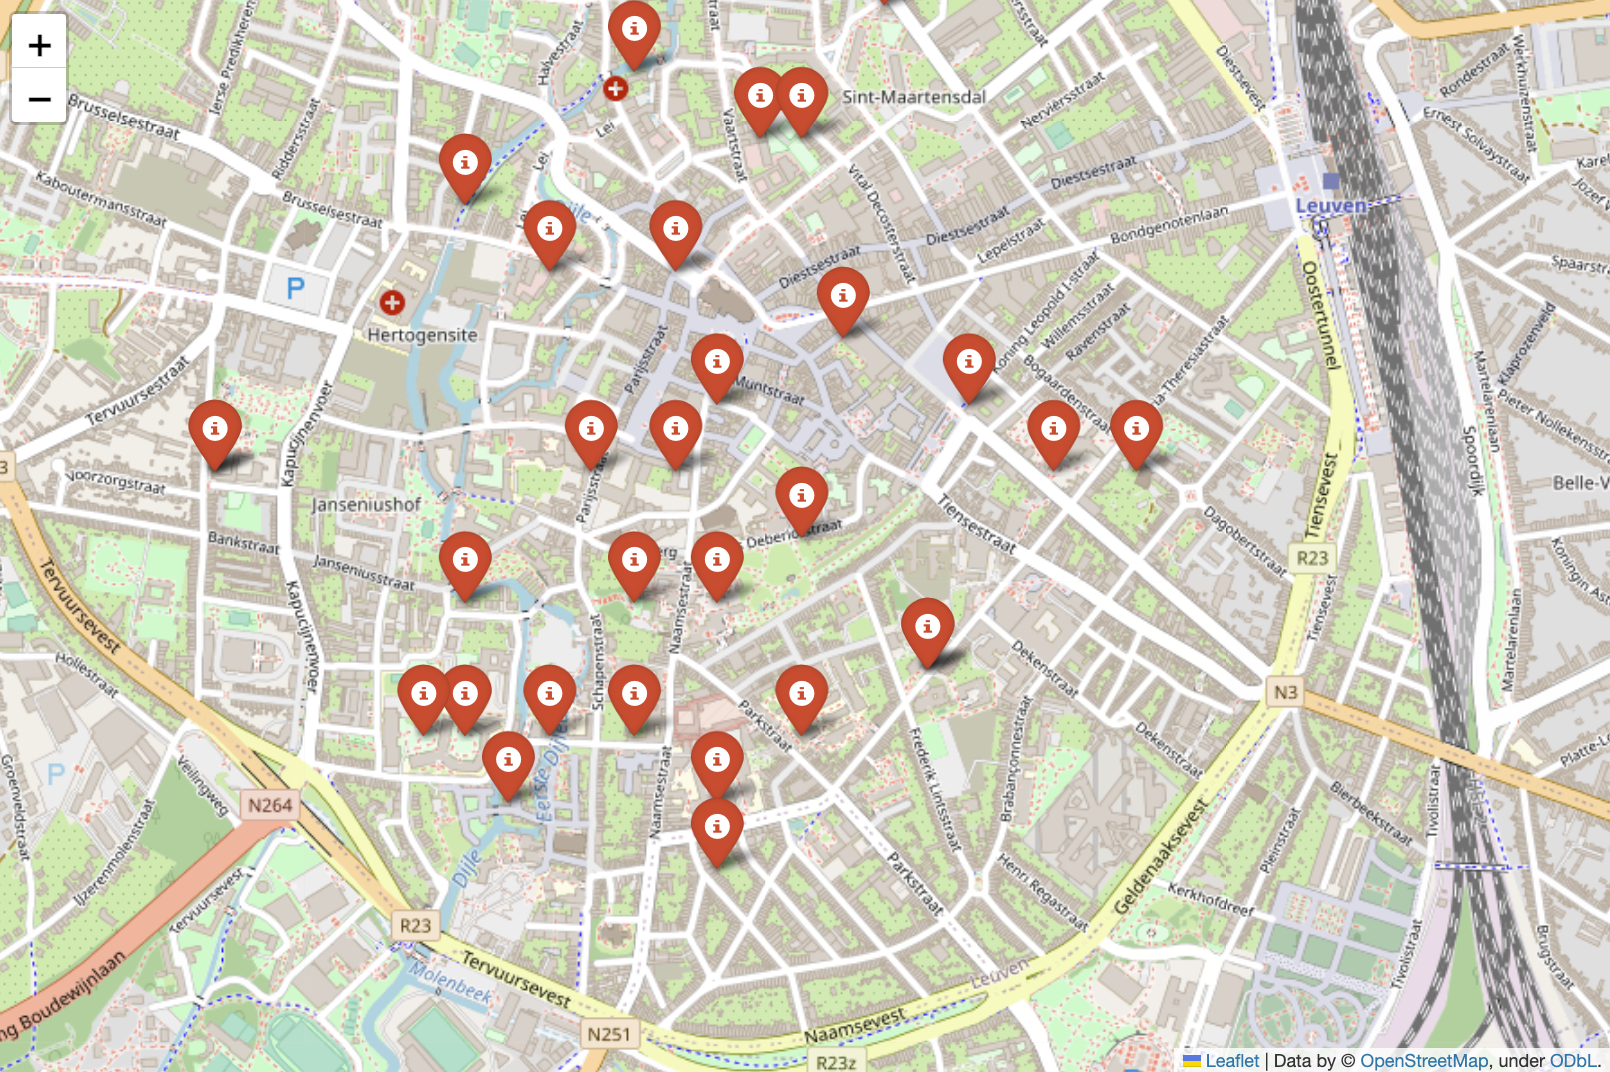

In [12]:
# Order and extract top 30 distance (stations) to Naamesetraat, just for display
closest_points = data.sort_values(by=['distance']).iloc[:30]

# Generate map and label the 10 stations
map = folium.Map(location=[50.877571, 4.704328], zoom_start=13) 
for index, row in closest_points.iterrows():
    lat = row['LAT']
    lon = row['LON']
    folium.Marker(location=[lat, lon], tooltip=row['ID'], icon=folium.Icon(color='red')).add_to(map)

# Save the map as an HTML file
map.save("map.html")

# Display the map within Jupyter Notebook
IFrame(src='map.html', width=900, height=600)


##### Step 2. Preprocess Weather Information from the 7 Selected Weather Stations

In [8]:
# Import data
files=['LC_2022Q1.csv',
       'LC_2022Q2.csv',
       'LC_2022Q3.csv',
       'LC_2022Q4.csv',]

# Loop through each csv in list files and read them into a consoldiated dataframe
df=pd.DataFrame()
for file in files:
    file='../data/raw/dataverse_files/'+file
    df_temp = pd.read_csv(file)
    df = pd.concat([df,df_temp])

df.drop_duplicates()

,DATEUTC,ID,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,...,Year,Month,Day,Hour,Minute,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-01 00:10:00,LC-002,92.0,11.78,38.0,0.0,0.0,0.0,-169.0,0.43,...,2022,1,1,0,10,0.0,13.11,13.11,13.0515,13.048027
1,2022-01-01 00:20:00,LC-002,92.0,11.73,37.0,0.0,0.0,0.0,-170.0,0.33,...,2022,1,1,0,20,0.0,13.01,13.01,12.9515,12.985849
2,2022-01-01 00:30:00,LC-002,92.0,11.73,38.0,0.0,0.0,0.0,-167.0,0.46,...,2022,1,1,0,30,0.0,13.00,13.00,12.9415,12.950322
3,2022-01-01 00:40:00,LC-002,92.0,11.72,37.0,0.0,0.0,0.0,-160.0,0.52,...,2022,1,1,0,40,0.0,13.00,13.00,12.9415,12.949550
4,2022-01-01 00:50:00,LC-002,92.0,11.72,38.0,0.0,0.0,0.0,-166.0,0.51,...,2022,1,1,0,50,0.0,13.00,13.00,12.9415,12.952268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430779,2022-12-31 23:20:00,LC-138,50.0,6.05,32.0,0.0,0.0,0.0,-49.0,0.67,...,2022,12,31,23,20,0.0,16.51,16.51,16.7600,16.762850
1430780,2022-12-31 23:30:00,LC-138,50.0,6.00,32.0,0.0,0.0,0.0,-65.0,1.39,...,2022,12,31,23,30,0.0,16.48,16.48,16.7300,16.707220
1430781,2022-12-31 23:40:00,LC-138,50.0,5.90,31.0,0.0,0.0,0.0,-41.0,1.25,...,2022,12,31,23,40,0.0,16.37,16.37,16.6200,16.600010
1430782,2022-12-31 23:50:00,LC-138,50.0,5.89,32.0,0.0,0.0,0.0,-51.0,1.22,...,2022,12,31,23,50,0.0,16.27,16.27,16.5200,16.500530


In [9]:
print(df.info()) # check column types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5546880 entries, 0 to 1430783
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DATEUTC       object 
 1   ID            object 
 2   LC_HUMIDITY   float64
 3   LC_DWPTEMP    float64
 4   LC_n          float64
 5   LC_RAD        float64
 6   LC_RAININ     float64
 7   LC_DAILYRAIN  float64
 8   LC_WINDDIR    float64
 9   LC_WINDSPEED  float64
 10  Date          object 
 11  Year          int64  
 12  Month         int64  
 13  Day           int64  
 14  Hour          int64  
 15  Minute        int64  
 16  LC_RAD60      float64
 17  LC_TEMP_QCL0  float64
 18  LC_TEMP_QCL1  float64
 19  LC_TEMP_QCL2  float64
 20  LC_TEMP_QCL3  float64
dtypes: float64(13), int64(5), object(3)
memory usage: 931.0+ MB
None


In [10]:
# Only select rows belonging to the 7 selected stations around Naamesetraat
station_selected=['LC-102','LC-109','LC-110','LC-112','LC-114','LC-117','LC-118']
df1=df[df['ID'].isin(station_selected)]

df1['ID'].value_counts() # check if the 7 stations were correctly selected

LC-102    52560
LC-109    52560
LC-110    52560
LC-112    52560
LC-114    52560
LC-117    52560
LC-118    52560
Name: ID, dtype: int64

In [11]:
# Use 'groupby' to calculate mean of the numerical columns for each hour
# This will dismiss some non-numerical columns
result = df1.groupby(['Month','Day', 'Hour'], as_index=False, sort=False)['LC_HUMIDITY','LC_DWPTEMP','LC_n','LC_RAD','LC_RAININ','LC_DAILYRAIN','LC_WINDDIR','LC_WINDSPEED','LC_RAD60','LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3'].mean()

result.head() # check which columns were dismissed

,Month,Day,Hour,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,1,1,0,82.333333,10.578571,37.452381,0.0,0.000000,0.0,6.142857,0.285476,0.0,13.776667,13.776667,13.645167,13.603201
1,1,1,1,87.452381,11.214048,37.500000,0.0,0.000000,0.0,-9.333333,0.072857,0.0,13.258810,13.258810,13.127310,13.119213
2,1,1,2,87.309524,11.040238,37.500000,0.0,0.000071,0.0,-13.976190,0.030714,0.0,13.082857,13.082857,12.951357,12.895210
3,1,1,3,87.119048,10.831905,37.500000,0.0,0.000000,0.0,-2.380952,0.049762,0.0,12.905000,12.905000,12.773500,12.780036
4,1,1,4,86.904762,10.518810,37.500000,0.0,0.000000,0.0,9.976190,0.053571,0.0,12.616667,12.616667,12.485167,12.509819


In [12]:
# Use 'drop' and 'merge' to include other potentially useful columns that were dismissed
df2 = df1.drop(['ID','Minute','LC_HUMIDITY','LC_DWPTEMP','LC_n','LC_RAD','LC_RAININ','LC_DAILYRAIN','LC_WINDDIR','LC_WINDSPEED','LC_RAD60','LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3'], axis=1, inplace=False)
result1 = pd.merge(result, df2, how='inner', on=['Month','Day', 'Hour'])
result_final = result1.drop_duplicates(['Month','Day', 'Hour'],keep='first')

result_final.head() # check if all potentially useful columns have been included

,Month,Day,Hour,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,DATEUTC,Date,Year
0,1,1,0,82.333333,10.578571,37.452381,0.0,0.000000,0.0,6.142857,0.285476,0.0,13.776667,13.776667,13.645167,13.603201,2022-01-01 00:10:00,2022-01-01,2022
42,1,1,1,87.452381,11.214048,37.500000,0.0,0.000000,0.0,-9.333333,0.072857,0.0,13.258810,13.258810,13.127310,13.119213,2022-01-01 01:00:00,2022-01-01,2022
84,1,1,2,87.309524,11.040238,37.500000,0.0,0.000071,0.0,-13.976190,0.030714,0.0,13.082857,13.082857,12.951357,12.895210,2022-01-01 02:00:00,2022-01-01,2022
126,1,1,3,87.119048,10.831905,37.500000,0.0,0.000000,0.0,-2.380952,0.049762,0.0,12.905000,12.905000,12.773500,12.780036,2022-01-01 03:00:00,2022-01-01,2022
168,1,1,4,86.904762,10.518810,37.500000,0.0,0.000000,0.0,9.976190,0.053571,0.0,12.616667,12.616667,12.485167,12.509819,2022-01-01 04:00:00,2022-01-01,2022


In [13]:
# Create 'Temperature' column: averaged temperature from the four 'LC_TEMP_..' coulumns
result_final["Temperature"]=result_final[['LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3']].apply(lambda x:(x['LC_TEMP_QCL0']+x['LC_TEMP_QCL1']+x['LC_TEMP_QCL2']+x['LC_TEMP_QCL3'])/4,axis=1)

result_final.head() # check if 'Temperature' column has been added

,Month,Day,Hour,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,DATEUTC,Date,Year,Temperature
0,1,1,0,82.333333,10.578571,37.452381,0.0,0.000000,0.0,6.142857,0.285476,0.0,13.776667,13.776667,13.645167,13.603201,2022-01-01 00:10:00,2022-01-01,2022,13.700425
42,1,1,1,87.452381,11.214048,37.500000,0.0,0.000000,0.0,-9.333333,0.072857,0.0,13.258810,13.258810,13.127310,13.119213,2022-01-01 01:00:00,2022-01-01,2022,13.191035
84,1,1,2,87.309524,11.040238,37.500000,0.0,0.000071,0.0,-13.976190,0.030714,0.0,13.082857,13.082857,12.951357,12.895210,2022-01-01 02:00:00,2022-01-01,2022,13.003070
126,1,1,3,87.119048,10.831905,37.500000,0.0,0.000000,0.0,-2.380952,0.049762,0.0,12.905000,12.905000,12.773500,12.780036,2022-01-01 03:00:00,2022-01-01,2022,12.840884
168,1,1,4,86.904762,10.518810,37.500000,0.0,0.000000,0.0,9.976190,0.053571,0.0,12.616667,12.616667,12.485167,12.509819,2022-01-01 04:00:00,2022-01-01,2022,12.557080


In [14]:
# Replace the first row value of "DATEUTC" with a 0 0'clock sharp
# The purpose is to coordinate with other data files used in the project
result_final['DATEUTC'].replace('2022-01-01 00:10:00', '2022-01-01 00:00:00', inplace=True)

result_final.head() # check if the anomalous value in the "DATEUTC" column has been replaced

,Month,Day,Hour,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3,DATEUTC,Date,Year,Temperature
0,1,1,0,82.333333,10.578571,37.452381,0.0,0.000000,0.0,6.142857,0.285476,0.0,13.776667,13.776667,13.645167,13.603201,2022-01-01 00:00:00,2022-01-01,2022,13.700425
42,1,1,1,87.452381,11.214048,37.500000,0.0,0.000000,0.0,-9.333333,0.072857,0.0,13.258810,13.258810,13.127310,13.119213,2022-01-01 01:00:00,2022-01-01,2022,13.191035
84,1,1,2,87.309524,11.040238,37.500000,0.0,0.000071,0.0,-13.976190,0.030714,0.0,13.082857,13.082857,12.951357,12.895210,2022-01-01 02:00:00,2022-01-01,2022,13.003070
126,1,1,3,87.119048,10.831905,37.500000,0.0,0.000000,0.0,-2.380952,0.049762,0.0,12.905000,12.905000,12.773500,12.780036,2022-01-01 03:00:00,2022-01-01,2022,12.840884
168,1,1,4,86.904762,10.518810,37.500000,0.0,0.000000,0.0,9.976190,0.053571,0.0,12.616667,12.616667,12.485167,12.509819,2022-01-01 04:00:00,2022-01-01,2022,12.557080


In [15]:
# Transform the data type of the "DATEUTC" column
# The purpose is to coordinate with other data files used in the project
result_final["DATEUTC"].apply(pd.Timestamp)

0        2022-01-01 00:00:00
42       2022-01-01 01:00:00
84       2022-01-01 02:00:00
126      2022-01-01 03:00:00
168      2022-01-01 04:00:00
                 ...        
367710   2022-12-31 19:00:00
367752   2022-12-31 20:00:00
367794   2022-12-31 21:00:00
367836   2022-12-31 22:00:00
367878   2022-12-31 23:00:00
Name: DATEUTC, Length: 8760, dtype: datetime64[ns]

In [25]:
# Save the preprocessing results as a .csv file
# This might include more columns than needed in the modeling step
# result_final.to_csv('data/processed/weather.csv',encoding = 'utf-8')